# Dados de Vacinação - SUS

Esse projeto de Data Analytics tem como objetivo a coleta de dados, a limpeza dos dados e a exploração dos dados de vacinação divulgados pelo 'Open Data SUS' no link https://opendatasus.saude.gov.br/.

## Dicionário de Dados

In [1]:
'''
document_id: identificador do documento
paciente_id: identificador do vacinado
paciente_idade: idade do vacinado
paciente_dataNascimento: Data de nascimento do vacinado
paciente_enumSexoBiologico: sexo do vacinado (M - Masculino; F - Feminino)
paciente_racaCor_codigo: código da raça/cor do vacinado (1; 2; 3; 4; 99)
paciente_racaCor_valor: descrição da raça/cor do vacinado (1 - Branca; 2 - Preta; 3 - Parda; 4 - Amarela; 99 - Sem informação)
paciente_endereco_coIbgeMunicipio: código IBGE do município de endereço do vacinado
paciente_endereco_coPais: código do país de endereço do vacinado
paciente_endereco_nmMunicipio: nome do município de endereço do vacinado
paciente_endereco_nmPais: nome do país de endereço do vacinado
paciente_endereco_uf: sigla da UF de endereço do vacinado
paciente_endereco_cep: 5 dígitos para anonimizado e 7 dígitos para identificado
paciente_nacionalidade_enumNacionalidade: Nacionalidade do vacinado
estabelecimento_valor: código do CNES do estabelecimento que realizou a vacinação
estabelecimento_razaosocial: nome/razão social do estabelecimento
estabelecimento_noFantasia: nome fantasia do estabelecimento
estabelecimento_municipio_codigo: código do município do estabelecimento
estabelecimento_municipio_nome: nome do município do estabelecimento
estabelecimento_uf: sigla da UF do estabelecimento
vacina_grupo_atendimento_code: código do grupo de atendimento ao qual pertence o vacinado
vacina_grupo_atendimento_nome: nome do grupo de atendimento ao qual pertence o vacinado
vacina_categoria_code: código da categoria
vacina_categoria_nome: descrição da categoria
vacina_lote: número do lote da vacina
vacina_fabricante_nome: nome do fabricante/fornecedor
vacina_fabricante_referencia: CNPJ do fabricante/fornecedor
vacina_dataAplicacao: data de aplicação da vacina
vacina_descricao_dose: descrição da dose
vacina_codigo: código da vacina
vacina_nome: nome da vacina/produto
sistema origem: nome do sistema de origem
'''

'\ndocument_id: identificador do documento\npaciente_id: identificador do vacinado\npaciente_idade: idade do vacinado\npaciente_dataNascimento: Data de nascimento do vacinado\npaciente_enumSexoBiologico: sexo do vacinado (M - Masculino; F - Feminino)\npaciente_racaCor_codigo: código da raça/cor do vacinado (1; 2; 3; 4; 99)\npaciente_racaCor_valor: descrição da raça/cor do vacinado (1 - Branca; 2 - Preta; 3 - Parda; 4 - Amarela; 99 - Sem informação)\npaciente_endereco_coIbgeMunicipio: código IBGE do município de endereço do vacinado\npaciente_endereco_coPais: código do país de endereço do vacinado\npaciente_endereco_nmMunicipio: nome do município de endereço do vacinado\npaciente_endereco_nmPais: nome do país de endereço do vacinado\npaciente_endereco_uf: sigla da UF de endereço do vacinado\npaciente_endereco_cep: 5 dígitos para anonimizado e 7 dígitos para identificado\npaciente_nacionalidade_enumNacionalidade: Nacionalidade do vacinado\nestabelecimento_valor: código do CNES do estabel

# Análise Exploratória de Dados

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

Estimativa da população segundo IBGE no link - 'https://sidra.ibge.gov.br/tabela/6579' para determinar estado de estudo.

In [3]:
populacao = pd.read_csv('populacao_estados_ibge.csv', sep=';')
populacao.rename(columns={'Cód' : 'Cod','Brasil e Unidade da Federação' : 'Estado', '2021' : 'Populacao'}, inplace=True)
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cód.       28 non-null     int64 
 1   Estado     28 non-null     object
 2   Populacao  28 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


In [4]:
populacao.head()

,Cód.,Estado,Populacao
0,1,Brasil,213317639
1,11,Rondônia,1815278
2,12,Acre,906876
3,13,Amazonas,4269995
4,14,Roraima,652713


<AxesSubplot:xlabel='Estado'>

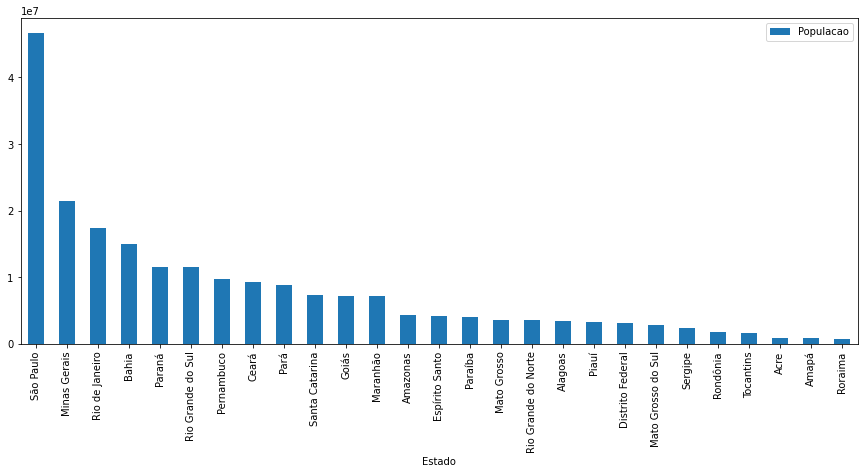

In [23]:
populacao[populacao['Estado'] != 'Brasil'].sort_values('Populacao', ascending = False).plot(kind='bar', x='Estado', y='Populacao', figsize = (15,6))

In [6]:
populacao[populacao['Estado'] == 'Roraima']

,Cód.,Estado,Populacao
4,14,Roraima,652713


Escolhi o estado de Roraima por possuir a menor população e provavelmente o menor dataset no portal do Open Data SUS.

In [7]:
dados = pd.read_csv(
    'https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIPNI/COVID/uf/uf%3DRO/part-00001-2550597c-5973-457e-8fc4-86a66e99a3a7.c000.csv',
    nrows = 1000,
    sep = ';')

In [8]:
dados.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,35119aff-cb77-40a1-8c34-ac695e9ea05c-i0b0,5e918079ab1e929e061dc7eca49838877de5bf9d28d938...,57,1964-03-22,F,3,PARDA,110020.0,10.0,PORTO VELHO,...,2.0,Faixa Etária,215VCD116W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-19,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,ee980b34-fbeb-41cc-b492-5aa6bef88c26-i0b0,e2a283d74916a0d6af27edb805026fe22aea6b4adad291...,56,1965-10-30,F,3,PARDA,110012.0,10.0,JI-PARANA,...,2.0,Faixa Etária,FJ8766,PFIZER,Organization/28290,2022-02-23,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,3532f857-9a65-4dbc-9db2-5820c8a32edc-i0b0,7708a663a05d43e4d5f4510c72d48475e8edd4c0cb367b...,52,1969-03-29,F,4,AMARELA,110020.0,10.0,PORTO VELHO,...,2.0,Faixa Etária,FA9090,PFIZER,Organization/00394544000851,2021-07-02,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
3,eea96f71-dcf2-4474-92e5-1a00b92ed771-i0b0,c32f2bd5f98c1c6641107b76dc72a08981f6c9a2af4ee8...,68,1952-10-18,M,1,BRANCA,110030.0,10.0,VILHENA,...,2.0,Faixa Etária,210209,SINOVAC/BUTANTAN,Organization/61189445000156,2021-05-12,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
4,3542f017-d2e0-4abb-96fa-77f275105d73-i0b0,a78fe276621567c2b429f931c12f4469e131b612336c58...,79,1942-07-11,F,99,SEM INFORMACAO,110020.0,10.0,PORTO VELHO,...,2.0,Faixa Etária,FG3525,PFIZER,Organization/00394544000851,2021-11-03,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


In [9]:
dados.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

## Escolha das colunas para construção da função de importação dos dados

### Pacientes

In [10]:
dados[[
    'paciente_id', 'paciente_idade',
    'paciente_dataNascimento', 'paciente_enumSexoBiologico',
    'paciente_racaCor_codigo', 'paciente_racaCor_valor',
    'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
    'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
    'paciente_endereco_uf', 'paciente_endereco_cep',
    'paciente_nacionalidade_enumNacionalidade'
]].head()

,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade
0,5e918079ab1e929e061dc7eca49838877de5bf9d28d938...,57,1964-03-22,F,3,PARDA,110020.0,10.0,PORTO VELHO,BRASIL,RO,76829,B
1,e2a283d74916a0d6af27edb805026fe22aea6b4adad291...,56,1965-10-30,F,3,PARDA,110012.0,10.0,JI-PARANA,BRASIL,RO,76914,B
2,7708a663a05d43e4d5f4510c72d48475e8edd4c0cb367b...,52,1969-03-29,F,4,AMARELA,110020.0,10.0,PORTO VELHO,BRASIL,RO,76804,B
3,c32f2bd5f98c1c6641107b76dc72a08981f6c9a2af4ee8...,68,1952-10-18,M,1,BRANCA,110030.0,10.0,VILHENA,BRASIL,RO,NaN,B
4,a78fe276621567c2b429f931c12f4469e131b612336c58...,79,1942-07-11,F,99,SEM INFORMACAO,110020.0,10.0,PORTO VELHO,BRASIL,RO,76804,B


In [11]:
dados.paciente_nacionalidade_enumNacionalidade.unique()

array(['B', 'E'], dtype=object)

In [12]:
dados.groupby('paciente_endereco_nmMunicipio').paciente_endereco_cep.count()

paciente_endereco_nmMunicipio
ALTA FLORESTA D'OESTE      11
ALTO ALEGRE DOS PARECIS     6
ALTO PARAISO               11
ALVORADA D'OESTE            9
ANDRADINA                   1
                           ..
UBERLANDIA                  1
URUPA                      10
VALE DO ANARI               2
VALE DO PARAISO             3
VILHENA                    56
Name: paciente_endereco_cep, Length: 92, dtype: int64

In [13]:
dados_paciente = dados[[
    'paciente_id', 'paciente_idade',
    'paciente_dataNascimento', 'paciente_enumSexoBiologico',
    'paciente_racaCor_valor', 'paciente_endereco_nmMunicipio'
]]

dados_paciente.head()

,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_nmMunicipio
0,5e918079ab1e929e061dc7eca49838877de5bf9d28d938...,57,1964-03-22,F,PARDA,PORTO VELHO
1,e2a283d74916a0d6af27edb805026fe22aea6b4adad291...,56,1965-10-30,F,PARDA,JI-PARANA
2,7708a663a05d43e4d5f4510c72d48475e8edd4c0cb367b...,52,1969-03-29,F,AMARELA,PORTO VELHO
3,c32f2bd5f98c1c6641107b76dc72a08981f6c9a2af4ee8...,68,1952-10-18,M,BRANCA,VILHENA
4,a78fe276621567c2b429f931c12f4469e131b612336c58...,79,1942-07-11,F,SEM INFORMACAO,PORTO VELHO


### Vacina

In [14]:
dados[[
    'vacina_grupoAtendimento_codigo',
    'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
    'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
    'vacina_fabricante_referencia', 'vacina_dataAplicacao',
    'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome'
]].head()

,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome
0,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,215VCD116W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-19,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FJ8766,PFIZER,Organization/28290,2022-02-23,Reforço,87,COVID-19 PFIZER - COMIRNATY
2,201,Pessoas de 18 a 64 anos,2.0,Faixa Etária,FA9090,PFIZER,Organization/00394544000851,2021-07-02,1ª Dose,87,COVID-19 PFIZER - COMIRNATY
3,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210209,SINOVAC/BUTANTAN,Organization/61189445000156,2021-05-12,2ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
4,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,FG3525,PFIZER,Organization/00394544000851,2021-11-03,Reforço,87,COVID-19 PFIZER - COMIRNATY


In [15]:
dados_vacina = dados[[
    'vacina_grupoAtendimento_nome', 'vacina_categoria_nome', 
    'vacina_fabricante_nome', 'vacina_dataAplicacao',
    'vacina_descricao_dose', 'vacina_nome'
]]

dados_vacina.head()

,vacina_grupoAtendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome
0,Pessoas de 18 a 64 anos,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-06-19,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,Pessoas de 18 a 64 anos,Faixa Etária,PFIZER,2022-02-23,Reforço,COVID-19 PFIZER - COMIRNATY
2,Pessoas de 18 a 64 anos,Faixa Etária,PFIZER,2021-07-02,1ª Dose,COVID-19 PFIZER - COMIRNATY
3,Pessoas de 65 a 69 anos,Faixa Etária,SINOVAC/BUTANTAN,2021-05-12,2ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC
4,Pessoas de 75 a 79 anos,Faixa Etária,PFIZER,2021-11-03,Reforço,COVID-19 PFIZER - COMIRNATY


### Estabelecimento

In [16]:
dados[[
    'estabelecimento_valor',
    'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
    'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
    'estabelecimento_uf'
]].head()

,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf
0,213241,MUNICIPIO DE PORTO VELHO,CENTRAL DE REDE DE FRIO PORTO VELHO,110020,PORTO VELHO,RO
1,2495279,MUNICIPIO DE JI PARANA,HOSPITAL DR CLAUDIONOR COUTO RORIZ,110012,JI-PARANA,RO
2,213241,MUNICIPIO DE PORTO VELHO,CENTRAL DE REDE DE FRIO PORTO VELHO,110020,PORTO VELHO,RO
3,6963862,PREFEITURA MUNICIPAL DE VILHENA,CENTRAL DE IMUNIZACAO E REDE DE FRIO DE VILHENA,110030,VILHENA,RO
4,213241,MUNICIPIO DE PORTO VELHO,CENTRAL DE REDE DE FRIO PORTO VELHO,110020,PORTO VELHO,RO


In [17]:
dados.groupby('estabelecimento_razaoSocial').estalecimento_noFantasia.nunique()

estabelecimento_razaoSocial
CASA DE DETENCAO DR JOSE MARIO ALVES DA SILVA URSO BRANCO     1
DISTRITO SANITARIO ESPECIAL DE PORTO VELHO RO MS JI PARANA    1
DISTRITO SANITARIO ESPECIAL INDIGENA                          1
DISTRITO SANITARIO ESPECIAL INDIGENA DE PORTO VELHO           1
DISTRITO SANITARIO ESPECIAL INDIGENA PORTO VELHO              1
                                                             ..
UNIDADE BASICA DE SAUDE                                       1
UNIDADE BASICA DE SAUDE DO PROGRAMA SAUDE DA FAMILIA          1
UNIDADE BASICA DE SAUDE DR AMAURI JOSE DA ROCHA               1
UNIDADE BASICA DE SAUDE ESTER DA SILVA ZOTESSO                1
UNIDADE BASICA DE SAUDE SAO FELIPE SEDE                       1
Name: estalecimento_noFantasia, Length: 69, dtype: int64

In [19]:
dados_estabelecimento = dados[[
    'estabelecimento_razaoSocial', 'estabelecimento_municipio_nome'
]]

dados_estabelecimento.head()

,estabelecimento_razaoSocial,estabelecimento_municipio_nome
0,MUNICIPIO DE PORTO VELHO,PORTO VELHO
1,MUNICIPIO DE JI PARANA,JI-PARANA
2,MUNICIPIO DE PORTO VELHO,PORTO VELHO
3,PREFEITURA MUNICIPAL DE VILHENA,VILHENA
4,MUNICIPIO DE PORTO VELHO,PORTO VELHO


In [20]:
dados_filtrados = dados[[
    'paciente_id', 'paciente_idade',
    'paciente_dataNascimento', 'paciente_enumSexoBiologico',
    'paciente_racaCor_valor', 'paciente_endereco_nmMunicipio',
    'vacina_grupoAtendimento_nome', 'vacina_categoria_nome', 
    'vacina_fabricante_nome', 'vacina_dataAplicacao',
    'vacina_descricao_dose', 'vacina_nome',
    'estabelecimento_razaoSocial', 'estabelecimento_municipio_nome'
]]

dados_filtrados.head()

,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_nmMunicipio,vacina_grupoAtendimento_nome,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,estabelecimento_razaoSocial,estabelecimento_municipio_nome
0,5e918079ab1e929e061dc7eca49838877de5bf9d28d938...,57,1964-03-22,F,PARDA,PORTO VELHO,Pessoas de 18 a 64 anos,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-06-19,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,MUNICIPIO DE PORTO VELHO,PORTO VELHO
1,e2a283d74916a0d6af27edb805026fe22aea6b4adad291...,56,1965-10-30,F,PARDA,JI-PARANA,Pessoas de 18 a 64 anos,Faixa Etária,PFIZER,2022-02-23,Reforço,COVID-19 PFIZER - COMIRNATY,MUNICIPIO DE JI PARANA,JI-PARANA
2,7708a663a05d43e4d5f4510c72d48475e8edd4c0cb367b...,52,1969-03-29,F,AMARELA,PORTO VELHO,Pessoas de 18 a 64 anos,Faixa Etária,PFIZER,2021-07-02,1ª Dose,COVID-19 PFIZER - COMIRNATY,MUNICIPIO DE PORTO VELHO,PORTO VELHO
3,c32f2bd5f98c1c6641107b76dc72a08981f6c9a2af4ee8...,68,1952-10-18,M,BRANCA,VILHENA,Pessoas de 65 a 69 anos,Faixa Etária,SINOVAC/BUTANTAN,2021-05-12,2ª Dose,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,PREFEITURA MUNICIPAL DE VILHENA,VILHENA
4,a78fe276621567c2b429f931c12f4469e131b612336c58...,79,1942-07-11,F,SEM INFORMACAO,PORTO VELHO,Pessoas de 75 a 79 anos,Faixa Etária,PFIZER,2021-11-03,Reforço,COVID-19 PFIZER - COMIRNATY,MUNICIPIO DE PORTO VELHO,PORTO VELHO


## Análises

In [26]:
dados_filtrados.describe()

,paciente_idade
count,1000.000000
mean,40.160000
std,18.947068
min,2.000000
25%,25.000000
50%,39.000000
75%,55.000000
max,93.000000


<AxesSubplot:xlabel='idade'>

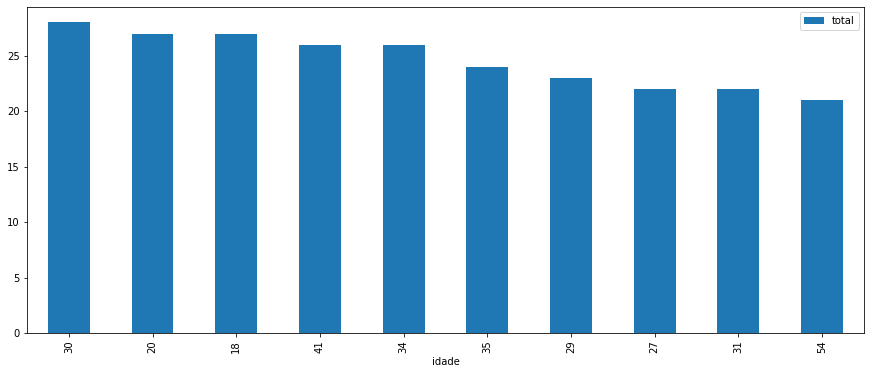

In [35]:
pd.DataFrame(dados_filtrados.paciente_idade.value_counts()).reset_index().rename(
    columns = {'index' : 'idade', 'paciente_idade' : 'total'}
).query("total >= 20").plot(kind = 'bar', x = 'idade', y = 'total', figsize = (15,6))